# Introduction to Matplotlib

The **Matplotlib** package can be used to make scientific-grade plots. You can import it with:

In [1]:
import matplotlib.pyplot as plt

If you are using IPython and you want to make interactive plots, you can start up IPython with:

    ipython --matplotlib

If you now type a plotting command, an interactive plot will pop up.

If you use the IPython notebook, add a cell containing:

In [2]:
%matplotlib inline

and the plots will appear inside the notebook.

## Basic plotting

The main plotting function is called ``plot``:

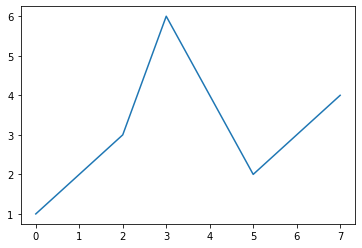

In [2]:
plt.plot([1,2,3,6,4,2,3,4])

In the above example, we only gave a single list, so it will assume the x values are the indices of the list/array.

However, we can instead specify the x values:

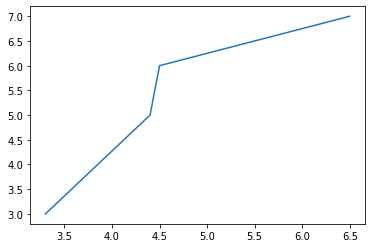

In [4]:
plt.plot([3.3, 4.4, 4.5, 6.5], [3., 5., 6., 7.])

In [ ]:
# plt.show()

Matplotlib can take Numpy arrays, so we can do for example:

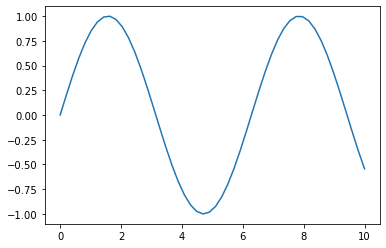

In [2]:
import numpy as np
x = np.linspace(0., 10., 50)
y = np.sin(x)
plt.plot(x, y)

The ``plot`` function is actually quite complex, and for example can take arguments specifying the type of point, the color of the line, and the width of the line:

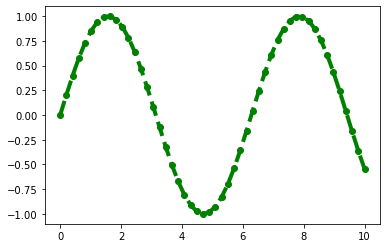

In [11]:
plt.plot(x, y, marker='o', color='green', linewidth=4, linestyle='--')

plt.plot(x, y, 'o', color='k')

The line can be hidden with:

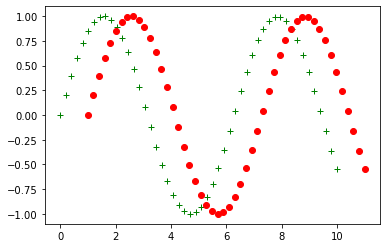

In [14]:
plt.plot(x, y,linewidth=0, color='green',  marker='+')
plt.plot(x+1, y,linewidth=0, color='red',  marker='o')

If you are interested, you can specify some of these attributes with a special syntax, which you can read up more about in the Matplotlib documentation:

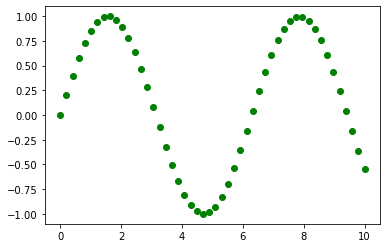

In [3]:
plt.plot(x, y, 'go')  # means green and circles

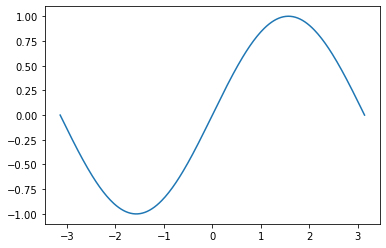

<Figure size 432x288 with 0 Axes>

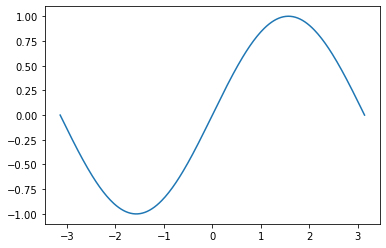

In [4]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

#plt.plot(X, C)

plt.figure()
plt.plot(X, S)

fig = plt.figure()
ax = fig.axes

fig, ax = plt.subplots()
ax.plot(X, S)

## Customizing plots

### fig, axs = plt.subplots(nrows, ncols, figsize=(8, 6), .....)

e.g. 

fig, axs = plt.subplots(2, 3)

1, 1 --> axs[0, 0]

1, 2 --> axs[0, 1]

1, 3 --> axs[0, 2]

axes = fig.axes() # [axs[0, 0], axs[0, 1], axs[0, 2], axs[1, 0], axs[1, 1], axs[1, 2]]

1, 1 --> axes[0]

1, 2 --> axes[1]

1, 3 --> axes[2]

2, 1 --> axes[3]

### fig = plt.figure()

fig.subplot(nrows, ncols, pos)

e.g.

plt.figure()

1, 1 --> plt.subplot(2, 3, 1)

plt.plot()

plt.legend()

plt.xlim()

1, 2 --> plt.subplot(2, 3, 2)


Text(0, 0.5, 'y values')

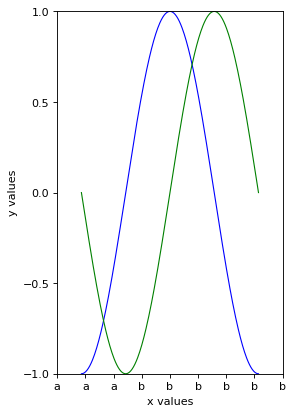

In [11]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 2, 1)

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label='cosine')

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label='sine')

# Set x limits
plt.xlim(-4.0, 4) # plt.xlim(-4)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9), ['a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b'])

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5))


plt.xlabel('x values')
plt.ylabel('y values')

# ax.set_xlabel()
# axes[0].set_xlabel()
# axs[0, 1].set_xlabel()


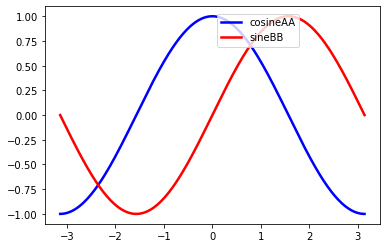

In [17]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosineAA")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sineBB")

plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.99), ncol=1, frameon=True) # upper center lower / left right


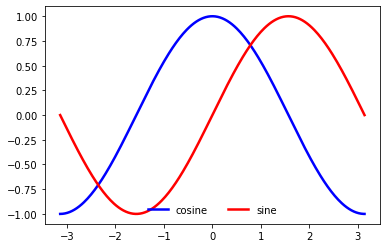

In [18]:
h1 = plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
h2 = plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.legend(['cosine', 'sine'], loc='lower center', ncol=2, frameon=False) # upper center lower / left right

## Exercise

Start off by loading the ``data/SIMAR_gaps.txt`` (Numpy lecture):
1. Plot Hm0 (complete series)
2. Plot Hm0 and, on top, plot the markers of the annual maximum values

In [25]:
import numpy as np
data = np.loadtxt('data/SIMAR_gaps.txt', skiprows=1)
data[data<0] = np.NaN

In [49]:
yy = data[:, 0]
hs = data[:, 4]

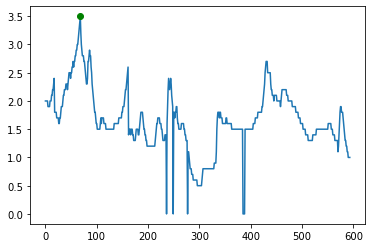

In [58]:
plt.plot(hs)
hs[np.isnan(hs)] = 0
plt.plot(hs.argmax(), hs.max(), 'go')

# hs.argmax is the same as np.where(hs == np.max(hs))

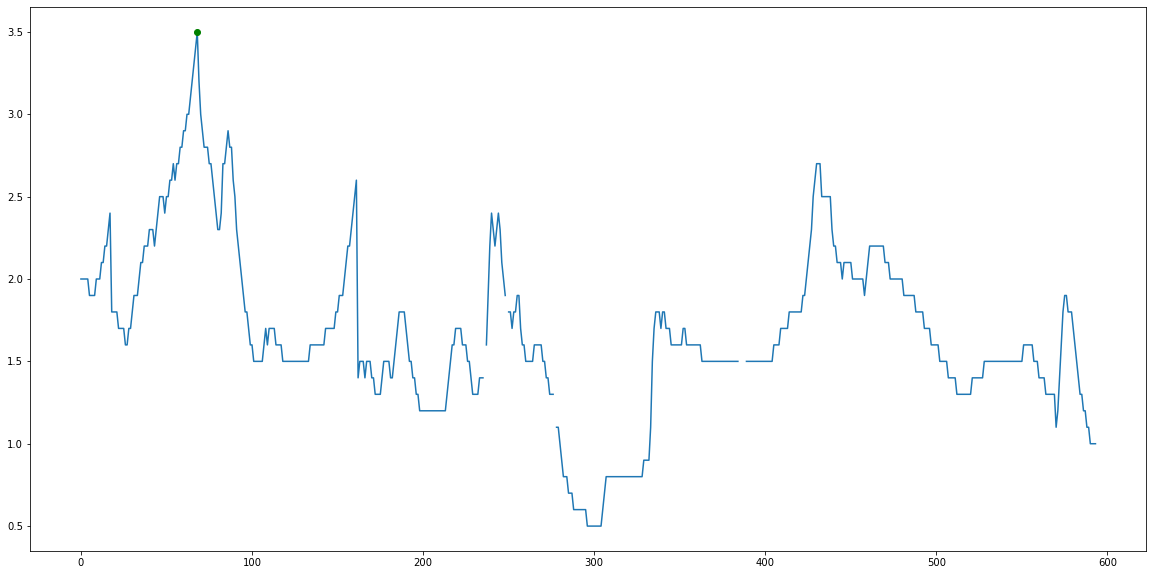

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(hs)

mask = hs == np.nanmax(hs)
ind = int(np.where(hs == np.nanmax(hs))[0])
plt.plot(ind, hs[mask], 'go')

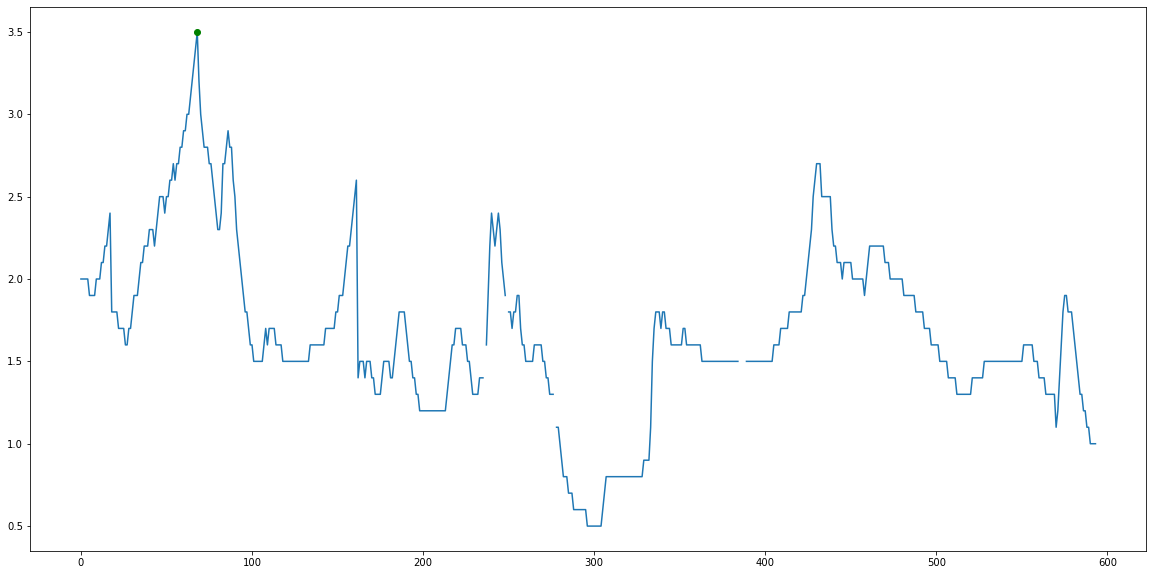

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(hs)

index = int(np.where(hs == np.nanmax(hs))[0])
plt.plot(index, hs[index], 'go')


## Other types of plots

### Scatter plots

While the ``plot`` function can be used to show scatter plots, it is mainly used for line plots, and the ``scatter`` function is more often used for scatter plots, because it allows more fine control of the markers:

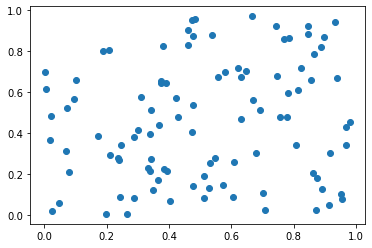

In [37]:
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y)
# ax.scatter()

### Errorbar

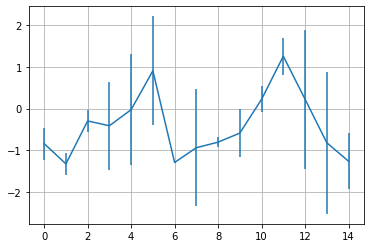

In [61]:
###  generate some random data
xdata2 = np.arange(15)
ydata2 = np.random.randn(15)
yerrors = np.random.randn(15)

###  initialize the figure
fig, ax = plt.subplots()

ax.errorbar(xdata2, ydata2, yerr=yerrors)
ax.grid()
#ax.grid(color='royalblue', linewidth=5)

<ErrorbarContainer object of 3 artists>

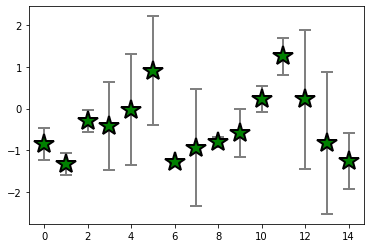

In [64]:
# linestyle = ls; color=c, marker=m
plt.errorbar(xdata2, ydata2, yerr=yerrors, ls='',         # no lines connecting points
             elinewidth=2,  # error line width
                                               ecolor='gray', # error color
                                               marker='*',    # circular plot symbols
                                               ms=20,         # markersize
                                               mfc='g',       # marker face color
                                               mew=2,         # marker edge width
                                               mec='k',       # marker edge color
                                
                                               capsize=6)     # error hat sizex

### Histograms

Histograms are easy to plot using the ``hist`` function:

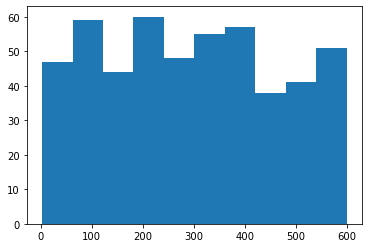

In [76]:
v = np.random.uniform(0., 600., 500)
h = plt.hist(v, bins='auto')  
# we do h= to capture the output of the function, but we don't use it
# bins = 'auto' (default), array, list (np.linspace(x, y, nn), int (number of bins))

In [75]:
np.histogram(v, bins=np.linspace(0, 600, 20))

(array([22, 40, 28, 25, 27, 20, 32, 27, 25, 24, 22, 29, 29, 25, 31, 22, 23,
        28, 21]),
 array([  0.        ,  31.57894737,  63.15789474,  94.73684211,
        126.31578947, 157.89473684, 189.47368421, 221.05263158,
        252.63157895, 284.21052632, 315.78947368, 347.36842105,
        378.94736842, 410.52631579, 442.10526316, 473.68421053,
        505.26315789, 536.84210526, 568.42105263, 600.        ]))

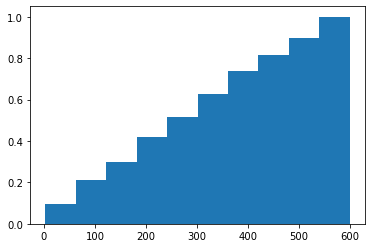

In [81]:
h = plt.hist(v, bins='auto', density=True, cumulative=True)  

In [82]:
h

(array([0.094, 0.212, 0.3  , 0.42 , 0.516, 0.626, 0.74 , 0.816, 0.898,
        1.   ]),
 array([  2.75781589,  62.46561623, 122.17341658, 181.88121692,
        241.58901727, 301.29681762, 361.00461796, 420.71241831,
        480.42021865, 540.128019  , 599.83581935]),
 <BarContainer object of 10 artists>)

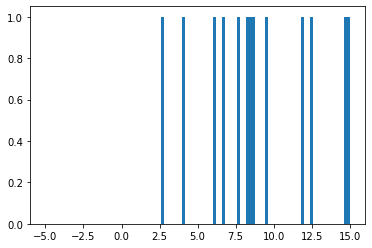

In [83]:
h = plt.hist(v, range=[-5., 15.], bins=100)

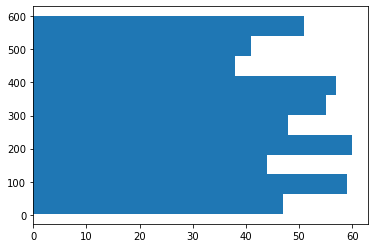

In [84]:
h = plt.hist(v, orientation='horizontal')

### Images

You can also show two-dimensional arrays with the ``imshow`` function:

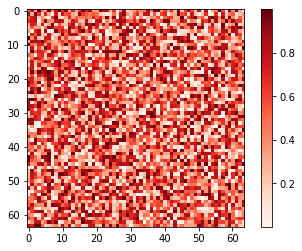

In [85]:
array = np.random.random((64, 64))
plt.imshow(array, cmap='Reds') # pcolormesh
plt.colorbar()

And the colormap can be changed:

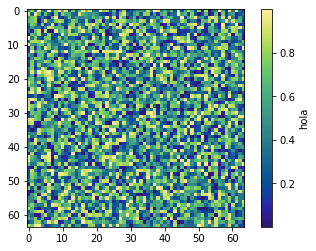

In [86]:
import cmocean as cmo
plt.imshow(array, cmap=cmo.cm.haline)
plt.colorbar(label='hola')

### Contour

/var/folders/yr/jscdd90s2rdcvd490226gpqc0000gn/T/ipykernel_75930/309029019.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X, Y), 8,  colors='k', linewidth=.5)


<a list of 9 text.Text objects>

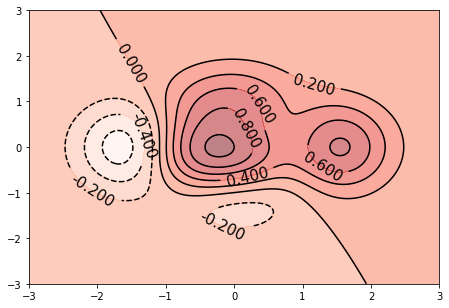

In [98]:
def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

z = f(x, y)
#print(z.size)

Z = f(X, Y)
#print(Z.shape)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X, Y), 8, alpha=.5, cmap='Reds')
C = plt.contour(X, Y, f(X, Y), 8,  colors='k', linewidth=.5)
plt.clabel(C, inline=1, fontsize=15)

#plt.xticks([])
#plt.yticks([])
#plt.show()

### Polar plots

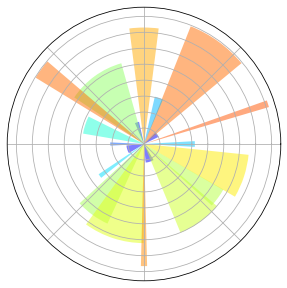

In [99]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4* np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)


ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

### Multiplots

Text(0.5, 1.0, 'Simple plot')

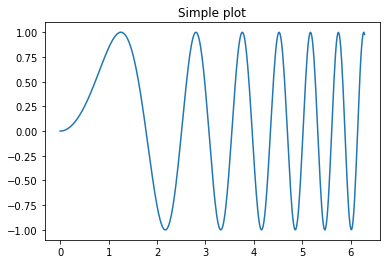

In [100]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

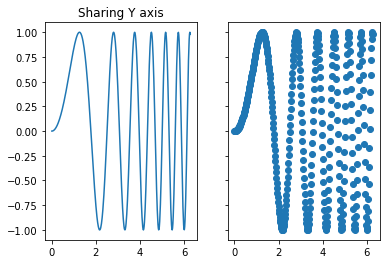

In [101]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# f, axs = plt.subplots(1, 2, sharey=True)
# axs[0, 0], axs[0, 1]
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

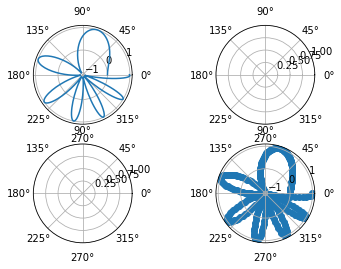

In [103]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

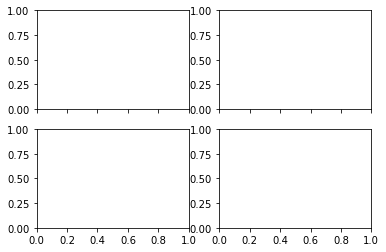

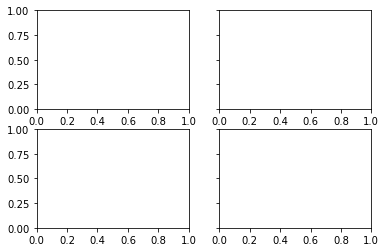

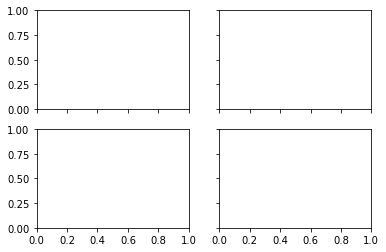

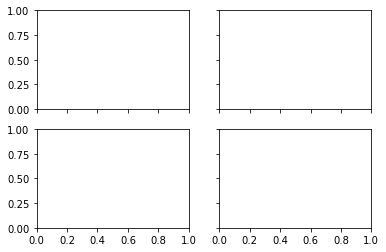

In [104]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

## Saving plots to files

To save a plot to a file, you can do for example:

In [110]:
from pathlib import Path
dir_pics = Path('img')
plt.savefig('my_plot1.png', bbox_inches='tight', dpi=300)
fig.savefig(dir_pics / 'my_plot.png')
fig.savefig('img/myplot.png')
# pdf, png, eps, 

<Figure size 432x288 with 0 Axes>

and you can then view the resulting file like you would iew a normal image. On Linux, you can also do:

    $ xv my_plot.png

in the terminal.

## Learning more

The easiest way to find out more about a function and available options is to use the ``?`` help in IPython:

        In [11]: plt.hist?

    Definition: plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
    Docstring:
    Plot a histogram.

    Call signature::

      hist(x, bins=10, range=None, normed=False, weights=None,
             cumulative=False, bottom=None, histtype='bar', align='mid',
             orientation='vertical', rwidth=None, log=False,
             color=None, label=None, stacked=False,
             **kwargs)

    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.

    etc.

But sometimes you don't even know how to make a specific type of plot, in which case you can look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) for example plots and scripts.


## Exercise

1. Make a figure of two subplots. 
2. On the first subplot you can plot Hm0.
3. On the second one, plot the histogram of Hm0. Try changing the number of bins and try plotting the CDF on top of it (with a line not bars).

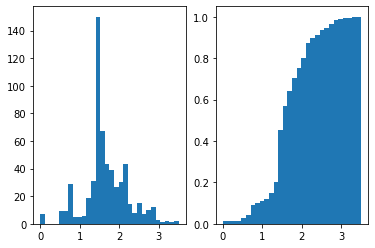

In [115]:
# data = hs
fig, (ax1, ax2) = plt.subplots(1, 2)
h = ax1.hist(hs, bins='auto')
h = ax2.hist(hs, bins='auto', density='True', cumulative='True')

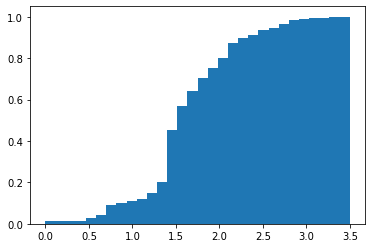

In [125]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
#h = ax1.hist(hs, bins='auto', density=True)
h1 = plt.hist(hs, bins='auto', density=True, cumulative=True)
#index = h1[1] + np.diff(h1[1])
#ax1.plot(h1[1], h1[0], '*', color='red')

In [130]:
Y = h1[0]
bins = h1[1]

In [135]:
binsc = bins[0:-1] + np.diff(bins)

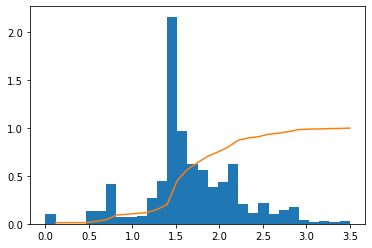

In [139]:
plt.hist(hs, bins='auto', density=True)
plt.plot(binsc, Y)

(array([0.01178451, 0.01178451, 0.01178451, 0.01178451, 0.02693603,
        0.04208754, 0.09090909, 0.0993266 , 0.10774411, 0.11784512,
        0.14983165, 0.2020202 , 0.45454545, 0.56734007, 0.63973064,
        0.70538721, 0.75084175, 0.8013468 , 0.87373737, 0.8973064 ,
        0.91077441, 0.93602694, 0.94781145, 0.96464646, 0.98484848,
        0.98989899, 0.99158249, 0.99494949, 0.996633  , 1.        ]),
 array([0.        , 0.11666667, 0.23333333, 0.35      , 0.46666667,
        0.58333333, 0.7       , 0.81666667, 0.93333333, 1.05      ,
        1.16666667, 1.28333333, 1.4       , 1.51666667, 1.63333333,
        1.75      , 1.86666667, 1.98333333, 2.1       , 2.21666667,
        2.33333333, 2.45      , 2.56666667, 2.68333333, 2.8       ,
        2.91666667, 3.03333333, 3.15      , 3.26666667, 3.38333333,
        3.5       ]),
 [<matplotlib.patches.Polygon at 0x7fcee142b310>])

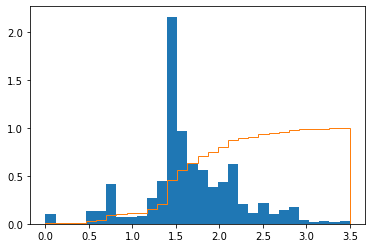

In [141]:
plt.hist(hs, bins='auto', density=True)
plt.hist(hs, bins='auto', density=True, cumulative=True, histtype='step')